In [16]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 8.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 9.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.3 MB/s eta 0:00:00


In [1]:
# import the functions for reading in the data files from project1.py
from project1 import load_air_quality, load_uhf_maps, search_by_zip, search_by_date
import os

# keep explicit path variables in the notebook (project1.py uses its own module-level paths),
# but importing the loader functions lets us call them directly:
current_dir = os.getcwd()
AIR_PATH = os.path.join(current_dir, 'air_quality.csv')
UHF_PATH = os.path.join(current_dir, 'uhf.csv')

air_quality_data = load_air_quality()
uhf_data = load_uhf_maps()

In [2]:
measurements, by_geo, by_date = load_air_quality()
zip_to_uhf, borough_to_uhf = load_uhf_maps()

In [3]:
# a) What was the highest and lowest pollution measurement ever recorded in zip code 10027?
data = search_by_zip('10027', zip_to_uhf, by_geo)

# Find the highest and lowest PM2.5 values in the data
pm25_values = [entry[3] for entry in data]
highest_pm25 = max(pm25_values)
lowest_pm25 = min(pm25_values)
print(f"Highest PM2.5 in 10027: {highest_pm25}")
print(f"Lowest PM2.5 in 10027: {lowest_pm25}")

Highest PM2.5 in 10027: 14.56
Lowest PM2.5 in 10027: 7.36


In [4]:
# b) Which UHF id had the worst pollution in 2019.

worst_pollutino = 0
worst_uhf_id = ''

for key in by_date.keys():
    if key.split('/')[-1] != '19':
        continue
    data = search_by_date(key, by_date)
    pm25_values = [entry[3] for entry in data]
    max_pm25 = max(pm25_values)
    if max_pm25 > worst_pollutino:
        worst_pollutino = max_pm25
        worst_uhf_id = data[pm25_values.index(max_pm25)][0]
print(f"Worst pollution in 2019 was UHF id {worst_uhf_id} with PM2.5 of {worst_pollutino}")

Worst pollution in 2019 was UHF id 306 with PM2.5 of 11.38


In [5]:
# c) What was the average air pollution in Manhattan in 2008? What was the average pollution in Manhattan in 2019.
data_2008 = []
data_2019 = []

for key in by_date.keys():
    if key.split('/')[-1] == '08':
        data = search_by_date(key, by_date)
        pm25_values = [entry[3] for entry in data if "Manhattan" in entry[1]]
        data_2008.extend(pm25_values)
    elif key.split('/')[-1] == '19':
        data = search_by_date(key, by_date)
        pm25_values = [entry[3] for entry in data if "Manhattan" in entry[1]]
        data_2019.extend(pm25_values)
avg_2008 = sum(data_2008) / len(data_2008)
avg_2019 = sum(data_2019) / len(data_2019)
print(f"Average PM2.5 in Manhattan in 2008: {avg_2008}")
print(f"Average PM2.5 in Manhattan in 2019: {avg_2019}")
    

Average PM2.5 in Manhattan in 2008: 15.335
Average PM2.5 in Manhattan in 2019: 9.8725


In [6]:
# d) Come up with at least two other questions to ask about the dataset and write code to answer them.

# Question 1: What is the average pollution level in each borough for the year 2020?
boroughs = {}
for key in by_date.keys():
    if key.split('/')[-1] == '20':
        data = search_by_date(key, by_date)
        for entry in data:
            borough = entry[1]
            pm25 = entry[3]
            if borough not in boroughs:
                boroughs[borough] = []
            boroughs[borough].append(pm25)
for borough in boroughs:
    avg_pm25 = sum(boroughs[borough]) / len(boroughs[borough])
    print(f"Average PM2.5 in {borough} in 2020: {avg_pm25}")

Average PM2.5 in South Bronx in 2020: 7.39
Average PM2.5 in Southern SI in 2020: 6.55
Average PM2.5 in Northern SI in 2020: 6.67
Average PM2.5 in Bayside Little Neck-Fresh Meadows in 2020: 6.71
Average PM2.5 in Union Square-Lower Manhattan in 2020: 8.02
Average PM2.5 in Chelsea-Village in 2020: 8.61
Average PM2.5 in Upper East Side-Gramercy in 2020: 7.89
Average PM2.5 in Rockaways in 2020: 6.27
Average PM2.5 in Southeast Queens in 2020: 6.57
Average PM2.5 in Jamaica in 2020: 6.73
Average PM2.5 in Southwest Queens in 2020: 6.69
Average PM2.5 in Ridgewood - Forest Hills in 2020: 6.91
Average PM2.5 in Flushing - Clearview in 2020: 7.05
Average PM2.5 in West Queens in 2020: 7.37
Average PM2.5 in Long Island City - Astoria in 2020: 7.76
Average PM2.5 in Upper West Side in 2020: 7.24
Average PM2.5 in East Harlem in 2020: 7.27
Average PM2.5 in Central Harlem - Morningside Heights in 2020: 7.36
Average PM2.5 in Washington Heights in 2020: 7.35
Average PM2.5 in Williamsburg - Bushwick in 2020: 

In [14]:
# Question 2: Which UHF id had the least pollution average pm2.5 levels in 2018
worst_pollutino = 0
worst_uhf_id = ''

for key in by_date.keys():
    if key.split('/')[-1] != '18':
        continue
    data = search_by_date(key, by_date)
    pm25_values = [entry[3] for entry in data]
    max_pm25 = max(pm25_values)
    if max_pm25 > worst_pollutino:
        worst_pollutino = max_pm25
        worst_uhf_id = data[pm25_values.index(max_pm25)][0]
print(f"Worst pollution in 2019 was UHF id {worst_uhf_id} with PM2.5 of {worst_pollutino}")

Worst pollution in 2019 was UHF id 306 with PM2.5 of 11.75


Prompt: use matplotlib to visualize the average monthly pollution in a specific 
zip code (such as 10027) across the entire available date range. (also uploaded the .ipynb file to give a better context)

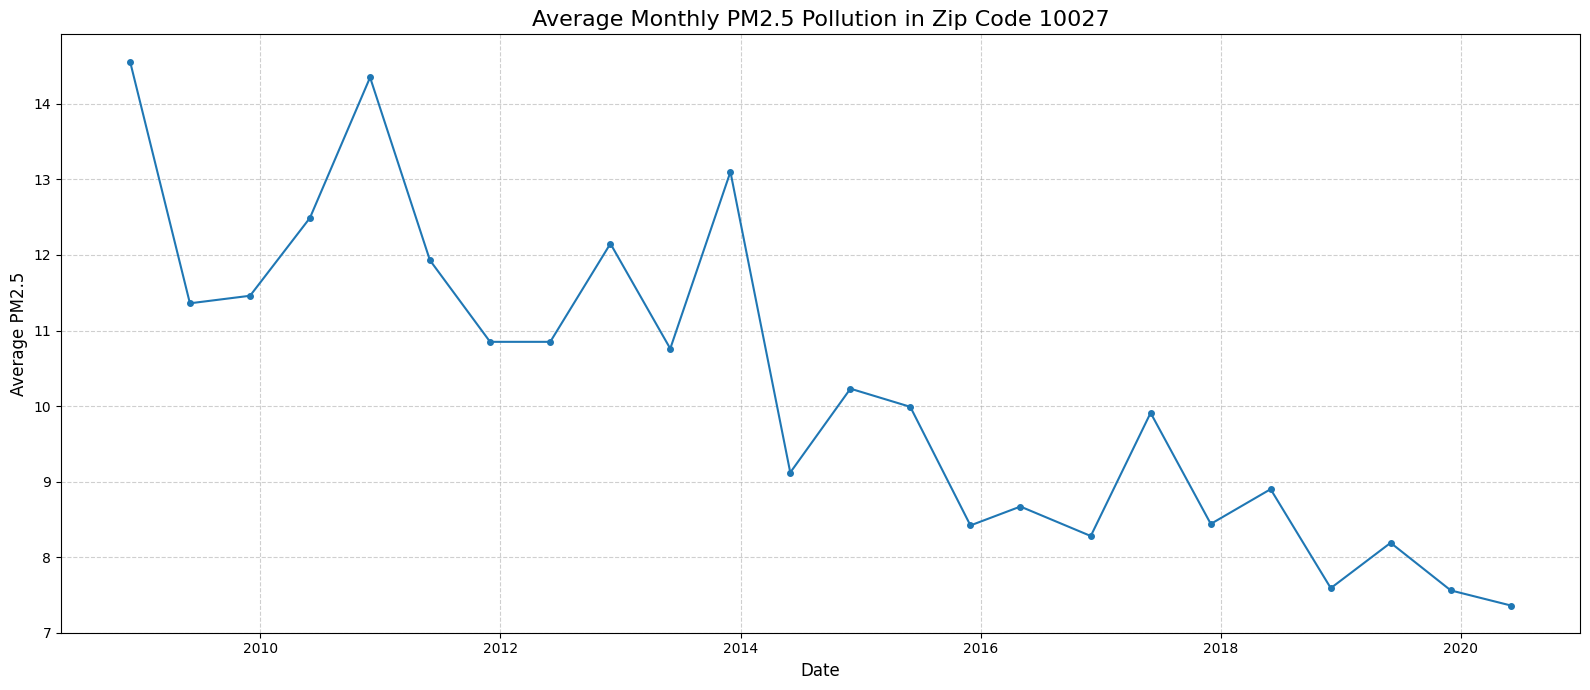

In [18]:
# Make sure plots appear in the notebook
import matplotlib.pyplot as plt
import datetime
from collections import defaultdict

# --- 1. Get Data for Zip Code 10027 ---
# We assume 'zip_to_uhf' and 'by_geo' are already loaded from cell 2
zip_code = '10027'
data = search_by_zip(zip_code, zip_to_uhf, by_geo)

# --- 2. Aggregate Data by Month ---
# Use a defaultdict to store a list of readings for each month
monthly_readings = defaultdict(list)

for entry in data:
    # Based on notebook context:
    # entry[0] = UHF ID
    # entry[1] = Borough/Neighborhood
    # entry[2] = Date string (e.g., '01/01/08')
    # entry[3] = PM2.5 value
    
    date_str = entry[2]
    pm25_value = entry[3]
    
    try:
        # Parse the date string. Based on the notebook's logic (using '08', '19'),
        # the format is Month/Day/2-digit-Year (%y)
        date_obj = datetime.datetime.strptime(date_str, '%m/%d/%y')
        
        # Create a key for the month (e.g., '2008-01-01')
        # This groups all days in a month together
        month_key = date_obj.replace(day=1)
        
        monthly_readings[month_key].append(pm25_value)
        
    except ValueError:
        print(f"Skipping bad date format: {date_str}")

# --- 3. Calculate Monthly Averages ---
monthly_averages = {}
for date, values in monthly_readings.items():
    monthly_averages[date] = sum(values) / len(values)

# --- 4. Prepare Data for Plotting ---
# Sort the data by date to ensure the line graph is in order
sorted_items = sorted(monthly_averages.items())

# Unzip the sorted items into two lists: dates (x-axis) and averages (y-axis)
dates = [item[0] for item in sorted_items]
averages = [item[1] for item in sorted_items]

# --- 5. Plot the Data ---
plt.figure(figsize=(16, 7))  # Make the plot wide to see the time series
plt.plot(dates, averages, marker='o', linestyle='-', markersize=4)

# Add titles and labels
plt.title(f'Average Monthly PM2.5 Pollution in Zip Code {zip_code}', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average PM2.5', fontsize=12)

# Improve readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()